In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from shutil import copyfile

# Local file in Colab
source_path = '/content/drive/MyDrive/NLP Folder/my_shortlist_pdf_list'  # Replace with your actual file path



All pdf file Read

In [ ]:
import os
!pip install pdfplumber
import pdfplumber  # Use this for reading PDFs. Install with: pip install pdfplumber

# Define the folder path in Google Drive
pdf_folder_path = '/content/drive/MyDrive/NLP Folder/my_shortlist_pdf_list'

# List all files in the folder
pdf_files = os.listdir(pdf_folder_path)
print("PDF Files in the folder:", pdf_files)

# Example: Read text from the first PDF file
for pdf_file in pdf_files:
    pdf_path = os.path.join(pdf_folder_path, pdf_file)
    with pdfplumber.open(pdf_path) as pdf:
        print(f"Content of {pdf_file}:\n")
        for page in pdf.pages:
            print(page.extract_text())
        print("\n" + "-" * 80 + "\n")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.0/42.0 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.5/48.5 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 51.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 74.0 MB/s eta 0:00:00
PDF Files in the folder: ['shortlist 30.pdf', 'shortlist 28.pdf', 'shortlist 23.pdf', 'shortlist 22.pdf', 'shortlist 29.pdf', 'shortlist 27.pdf', 'shortlist 21.pdf', 'shortlist 26.pdf', 'shortlist 25.pdf', 'shortlist 24.pdf', 'shortlist 31.pdf']
Content of shortlist 30.pdf:

MODERE.COM
PRIVACY POLICY
Thank you for visiting Modere.com. Modere understands that on-line privacy is very important to you. We have
adopted this Internet Privacy Policy as part of our commitment to your privacy. The terms “we”, “us”, and “our”
refer to the Modere, Inc. family of companies and Modere.com.
This Internet Privacy P

In [ ]:
import os
import pdfplumber
import re

# Define paths
pdf_folder_path = '/content/drive/MyDrive/NLP Folder/my_shortlist_pdf_list'  # Path to your PDF folder in Google Drive
output_folder = '/content/drive/MyDrive/NLP Folder/new_my_shortlist_pdf_list'  # Folder to save cleaned text files
os.makedirs(output_folder, exist_ok=True)  # Create the folder if it doesn't exist

# Function to clean extracted text
def clean_text(text):
    """
    Cleans the extracted text by:
    - Removing extra spaces, line breaks, tabs
    - Removing special characters
    """
    # Remove extra spaces, line breaks, and tabs
    text = re.sub(r'\s+', ' ', text)
    # Remove non-printable characters (optional)
    text = re.sub(r'[^\x20-\x7E]', '', text)
    return text.strip()

# Process all PDF files
for pdf_file in os.listdir(pdf_folder_path):
    if pdf_file.endswith('.pdf'):
        pdf_path = os.path.join(pdf_folder_path, pdf_file)
        print(f"Processing: {pdf_file}")

        # Extract text from the PDF
        extracted_text = ""
        with pdfplumber.open(pdf_path) as pdf:
            for page in pdf.pages:
                extracted_text += page.extract_text()

        # Clean the extracted text
        cleaned_text = clean_text(extracted_text)

        # Save the cleaned text to a new file
        output_file = os.path.join(output_folder, f"{os.path.splitext(pdf_file)[0]}.txt")
        with open(output_file, 'w', encoding='utf-8') as f:
            f.write(cleaned_text)

        print(f"Cleaned text saved to: {output_file}")

print("All PDF files processed and cleaned.")


Processing: shortlist 30.pdf
Cleaned text saved to: /content/drive/MyDrive/NLP Folder/new_my_shortlist_pdf_list/shortlist 30.txt
Processing: shortlist 28.pdf
Cleaned text saved to: /content/drive/MyDrive/NLP Folder/new_my_shortlist_pdf_list/shortlist 28.txt
Processing: shortlist 23.pdf
Cleaned text saved to: /content/drive/MyDrive/NLP Folder/new_my_shortlist_pdf_list/shortlist 23.txt
Processing: shortlist 22.pdf
Cleaned text saved to: /content/drive/MyDrive/NLP Folder/new_my_shortlist_pdf_list/shortlist 22.txt
Processing: shortlist 29.pdf
Cleaned text saved to: /content/drive/MyDrive/NLP Folder/new_my_shortlist_pdf_list/shortlist 29.txt
Processing: shortlist 27.pdf
Cleaned text saved to: /content/drive/MyDrive/NLP Folder/new_my_shortlist_pdf_list/shortlist 27.txt
Processing: shortlist 21.pdf
Cleaned text saved to: /content/drive/MyDrive/NLP Folder/new_my_shortlist_pdf_list/shortlist 21.txt
Processing: shortlist 26.pdf
Cleaned text saved to: /content/drive/MyDrive/NLP Folder/new_my_shor

In [ ]:
!pip install torch
!pip install transformers
!pip install openai


In [ ]:
from transformers import pipeline
import os
import pandas as pd
# Define paths
cleaned_text_folder = '/content/drive/MyDrive/NLP Folder/new_my_shortlist_pdf_list'  # Folder with cleaned text files
output_summary_folder = '/content/drive/MyDrive/NLP Folder/Saved_summery_lists'  # Folder to save summaries
os.makedirs(output_summary_folder, exist_ok=True)  # Create the folder if it doesn't exist

# Load the summarization pipeline
#model_name = "facebook/bart-large-cnn"  # Change to "t5-small" or "gpt-3.5-turbo" if needed
#summarizer = pipeline("summarization", model=model_name)
# Load Summarization Pipelines for BART and T5
bart_summarizer = pipeline("summarization", model="facebook/bart-large-cnn")
t5_summarizer = pipeline("summarization", model="t5-small")
# Summarize each text file
# Function to clean and summarize text
def summarize_text(text, model_name):
    summarizer = None
    if model_name == "bart":
        summarizer = bart_summarizer
    elif model_name == "t5":
        summarizer = t5_summarizer

    chunk_size = 512  # Max token length for BART and T5
    text_chunks = [text[i:i+chunk_size] for i in range(0, len(text), chunk_size)]
    summary = ""

    if summarizer:
        # Use BART or T5 summarizer
        for chunk in text_chunks:
            result = summarizer(chunk, max_length=150, min_length=40, do_sample=False)
            summary += result[0]['summary_text'] + " "
    else:
        # Use GPT summarizer
        for chunk in text_chunks:
            summary += summarize_with_gpt(chunk) + " "

    return summary.strip()

# Process Each Cleaned Text File
results = []

for text_file in os.listdir(cleaned_text_folder):
    if text_file.endswith('.txt'):
        text_path = os.path.join(cleaned_text_folder, text_file)

        # Read the cleaned text
        with open(text_path, 'r', encoding='utf-8') as f:
            text = f.read()


# Generate Summaries
        bart_summary = summarize_text(text, "bart")
        t5_summary = summarize_text(text, "t5")
# Save Summaries for Each Model
        base_name = os.path.splitext(text_file)[0]
        with open(os.path.join(output_summary_folder, f"bart_{base_name}.txt"), 'w', encoding='utf-8') as f:
            f.write(bart_summary)
        with open(os.path.join(output_summary_folder, f"t5_{base_name}.txt"), 'w', encoding='utf-8') as f:
            f.write(t5_summary)
         # Collect Results for DataFrame
        results.append({
            "File": text_file,
            "BART_Summary": bart_summary,
            "T5_Summary": t5_summary,
         })

        print(f"Summaries generated for {text_file}")

# Save Results to Excel
df = pd.DataFrame(results)
df.to_excel('/content/drive/MyDrive/NLP Folder/excelsheet/comparison.xlsx', index=False)

print("Summaries for all models saved to summaries_comparison.xlsx")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

Your max_length is set to 150, but your input_length is only 112. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=56)
Your max_length is set to 150, but your input_length is only 99. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=49)
Your max_length is set to 150, but your input_length is only 111. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=55)
Your max_length is set to 150, but your input_length is only 100. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Y

Summaries generated for shortlist 30.txt


Your max_length is set to 150, but your input_length is only 100. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 150, but your input_length is only 104. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=52)
Your max_length is set to 150, but your input_length is only 93. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=46)
Your max_length is set to 150, but your input_length is only 102. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=51)
Y

Summaries generated for shortlist 28.txt


Your max_length is set to 150, but your input_length is only 110. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=55)
Your max_length is set to 150, but your input_length is only 94. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=47)
Your max_length is set to 150, but your input_length is only 95. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=47)
Your max_length is set to 150, but your input_length is only 100. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Yo

Summaries generated for shortlist 23.txt


Your max_length is set to 150, but your input_length is only 99. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=49)
Your max_length is set to 150, but your input_length is only 122. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=61)
Your max_length is set to 150, but your input_length is only 7. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=3)
Your max_length is set to 150, but your input_length is only 110. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=55)
Your

Summaries generated for shortlist 22.txt


Your max_length is set to 150, but your input_length is only 97. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=48)
Your max_length is set to 150, but your input_length is only 110. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=55)
Your max_length is set to 150, but your input_length is only 107. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=53)
Your max_length is set to 150, but your input_length is only 93. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=46)
Yo

Summaries generated for shortlist 29.txt


Your max_length is set to 150, but your input_length is only 93. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=46)
Your max_length is set to 150, but your input_length is only 99. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=49)
Your max_length is set to 150, but your input_length is only 109. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=54)
Your max_length is set to 150, but your input_length is only 97. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=48)
You

Summaries generated for shortlist 27.txt


Your max_length is set to 150, but your input_length is only 106. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=53)
Your max_length is set to 150, but your input_length is only 97. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=48)
Your max_length is set to 150, but your input_length is only 91. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=45)
Your max_length is set to 150, but your input_length is only 104. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=52)
Yo

Summaries generated for shortlist 26.txt


Your max_length is set to 150, but your input_length is only 114. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=57)
Your max_length is set to 150, but your input_length is only 117. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=58)
Your max_length is set to 150, but your input_length is only 80. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=40)
Your max_length is set to 150, but your input_length is only 91. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=45)
Yo

Summaries generated for shortlist 21.txt


Your max_length is set to 150, but your input_length is only 101. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 150, but your input_length is only 102. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=51)
Your max_length is set to 150, but your input_length is only 113. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=56)
Your max_length is set to 150, but your input_length is only 97. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=48)
Y

Summaries generated for shortlist 25.txt


Your max_length is set to 150, but your input_length is only 99. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=49)
Your max_length is set to 150, but your input_length is only 67. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=33)
Your max_length is set to 150, but your input_length is only 103. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=51)
Your max_length is set to 150, but your input_length is only 102. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=51)
Yo

Summaries generated for shortlist 24.txt


Your max_length is set to 150, but your input_length is only 89. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=44)
Your max_length is set to 150, but your input_length is only 92. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=46)
Your max_length is set to 150, but your input_length is only 91. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=45)
Your max_length is set to 150, but your input_length is only 55. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=27)
Your

Summaries generated for shortlist 31.txt
Summaries for all models saved to summaries_comparison.xlsx


In [ ]:
!pip install PyPDF2
!pip install pymupdf
!pip install evaluate
!pip install rouge-score
!pip install datasets nltk


## **Rougescore evalate **

In [ ]:
from transformers import pipeline
import os
import pandas as pd
from rouge_score import rouge_scorer

# Define paths
cleaned_text_folder = '/content/drive/MyDrive/NLP Folder/new_my_shortlist_pdf_list'  # Folder with cleaned text files
output_summary_folder = '/content/drive/MyDrive/NLP Folder/Saved_summery_lists'  # Folder to save summaries
os.makedirs(output_summary_folder, exist_ok=True)  # Create the folder if it doesn't exist

# Load Summarization Pipelines for BART and T5
bart_summarizer = pipeline("summarization", model="facebook/bart-large-cnn")
t5_summarizer = pipeline("summarization", model="t5-small")

# Initialize ROUGE scorer
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

# Function to clean and summarize text
def summarize_text(text, model_name):
    summarizer = None
    if model_name == "bart":
        summarizer = bart_summarizer
    elif model_name == "t5":
        summarizer = t5_summarizer

    chunk_size = 512  # Max token length for BART and T5
    text_chunks = [text[i:i+chunk_size] for i in range(0, len(text), chunk_size)]
    summary = ""

    if summarizer:
        # Use BART or T5 summarizer
        for chunk in text_chunks:
            result = summarizer(chunk, max_length=150, min_length=40, do_sample=False)
            summary += result[0]['summary_text'] + " "
    return summary.strip()

# Function to calculate ROUGE score
def calculate_rouge_scores(reference, hypothesis):
    scores = scorer.score(reference, hypothesis)
    return scores

# Process Each Cleaned Text File
results = []

for text_file in os.listdir(cleaned_text_folder):
    if text_file.endswith('.txt'):
        text_path = os.path.join(cleaned_text_folder, text_file)

        # Read the cleaned text
        with open(text_path, 'r', encoding='utf-8') as f:
            text = f.read()

        # Generate Summaries
        bart_summary = summarize_text(text, "bart")
        t5_summary = summarize_text(text, "t5")

        # Assume reference summary is a ground-truth (manual summary)
        # You can replace this with the actual reference summary for your case
        reference_summary = text  # For demonstration purposes, use the text as reference

        # Calculate ROUGE scores for BART and T5 summaries
        bart_rouge = calculate_rouge_scores(reference_summary, bart_summary)
        t5_rouge = calculate_rouge_scores(reference_summary, t5_summary)

        # Save Summaries for Each Model
        base_name = os.path.splitext(text_file)[0]
        with open(os.path.join(output_summary_folder, f"bart_{base_name}.txt"), 'w', encoding='utf-8') as f:
            f.write(bart_summary)
        with open(os.path.join(output_summary_folder, f"t5_{base_name}.txt"), 'w', encoding='utf-8') as f:
            f.write(t5_summary)

        # Collect Results for DataFrame
        results.append({
            "File": text_file,
            "BART_Summary": bart_summary,
            "T5_Summary": t5_summary,
            "BART_ROUGE1": bart_rouge['rouge1'].fmeasure,
            "BART_ROUGE2": bart_rouge['rouge2'].fmeasure,
            "BART_ROUGEL": bart_rouge['rougeL'].fmeasure,
            "T5_ROUGE1": t5_rouge['rouge1'].fmeasure,
            "T5_ROUGE2": t5_rouge['rouge2'].fmeasure,
            "T5_ROUGEL": t5_rouge['rougeL'].fmeasure
        })

        print(f"Summaries and ROUGE scores generated for {text_file}")

# Save Results to Excel
df = pd.DataFrame(results)
df.to_excel('/content/drive/MyDrive/NLP Folder/excelsheet/comparison_with_rouge.xlsx', index=False)

print("Summaries and ROUGE scores for all models saved to comparison_with_rouge.xlsx")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Your max_length is set to 150, but your input_length is only 112. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=56)
Your max_length is set to 150, but your input_length is only 99. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...'

Summaries and ROUGE scores generated for shortlist 30.txt


Your max_length is set to 150, but your input_length is only 100. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 150, but your input_length is only 104. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=52)
Your max_length is set to 150, but your input_length is only 93. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=46)
Your max_length is set to 150, but your input_length is only 102. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=51)
Y

Summaries and ROUGE scores generated for shortlist 28.txt


Your max_length is set to 150, but your input_length is only 110. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=55)
Your max_length is set to 150, but your input_length is only 94. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=47)
Your max_length is set to 150, but your input_length is only 95. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=47)
Your max_length is set to 150, but your input_length is only 100. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Yo

Summaries and ROUGE scores generated for shortlist 23.txt


Your max_length is set to 150, but your input_length is only 99. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=49)
Your max_length is set to 150, but your input_length is only 122. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=61)
Your max_length is set to 150, but your input_length is only 7. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=3)
Your max_length is set to 150, but your input_length is only 110. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=55)
Your

Summaries and ROUGE scores generated for shortlist 22.txt


Your max_length is set to 150, but your input_length is only 97. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=48)
Your max_length is set to 150, but your input_length is only 110. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=55)
Your max_length is set to 150, but your input_length is only 107. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=53)
Your max_length is set to 150, but your input_length is only 93. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=46)
Yo

Summaries and ROUGE scores generated for shortlist 29.txt


Your max_length is set to 150, but your input_length is only 93. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=46)
Your max_length is set to 150, but your input_length is only 99. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=49)
Your max_length is set to 150, but your input_length is only 109. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=54)
Your max_length is set to 150, but your input_length is only 97. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=48)
You

Summaries and ROUGE scores generated for shortlist 27.txt


Your max_length is set to 150, but your input_length is only 106. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=53)
Your max_length is set to 150, but your input_length is only 97. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=48)
Your max_length is set to 150, but your input_length is only 91. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=45)
Your max_length is set to 150, but your input_length is only 104. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=52)
Yo

Summaries and ROUGE scores generated for shortlist 26.txt


Your max_length is set to 150, but your input_length is only 114. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=57)
Your max_length is set to 150, but your input_length is only 117. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=58)
Your max_length is set to 150, but your input_length is only 80. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=40)
Your max_length is set to 150, but your input_length is only 91. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=45)
Yo

Summaries and ROUGE scores generated for shortlist 21.txt


Your max_length is set to 150, but your input_length is only 101. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 150, but your input_length is only 102. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=51)
Your max_length is set to 150, but your input_length is only 113. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=56)
Your max_length is set to 150, but your input_length is only 97. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=48)
Y

Summaries and ROUGE scores generated for shortlist 25.txt


Your max_length is set to 150, but your input_length is only 99. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=49)
Your max_length is set to 150, but your input_length is only 67. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=33)
Your max_length is set to 150, but your input_length is only 103. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=51)
Your max_length is set to 150, but your input_length is only 102. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=51)
Yo

Summaries and ROUGE scores generated for shortlist 24.txt


Your max_length is set to 150, but your input_length is only 89. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=44)
Your max_length is set to 150, but your input_length is only 92. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=46)
Your max_length is set to 150, but your input_length is only 91. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=45)
Your max_length is set to 150, but your input_length is only 55. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=27)
Your

Summaries and ROUGE scores generated for shortlist 31.txt
Summaries and ROUGE scores for all models saved to comparison_with_rouge.xlsx


# **Bart , t5 model evaluate matrix : rouge and meteror **

In [ ]:
import nltk
from nltk.translate.meteor_score import meteor_score
import os
import pandas as pd
from rouge_score import rouge_scorer
from transformers import pipeline
from nltk.tokenize import word_tokenize  # Ensure this import is added

# Download necessary NLTK resources (only needed once)
nltk.download('punkt')

# Define paths
cleaned_text_folder = '/content/drive/MyDrive/NLP Folder/new_my_shortlist_pdf_list'  # Folder with cleaned text files
output_summary_folder = '/content/drive/MyDrive/NLP Folder/Saved_summery_lists'  # Folder to save summaries
os.makedirs(output_summary_folder, exist_ok=True)  # Create the folder if it doesn't exist

# Load Summarization Pipelines for BART and T5
bart_summarizer = pipeline("summarization", model="facebook/bart-large-cnn")
t5_summarizer = pipeline("summarization", model="t5-small")

# Initialize ROUGE scorer
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

# Function to clean and summarize text
def summarize_text(text, model_name):
    summarizer = None
    if model_name == "bart":
        summarizer = bart_summarizer
    elif model_name == "t5":
        summarizer = t5_summarizer

    chunk_size = 512  # Max token length for BART and T5
    text_chunks = [text[i:i+chunk_size] for i in range(0, len(text), chunk_size)]
    summary = ""

    if summarizer:
        # Use BART or T5 summarizer
        for chunk in text_chunks:
            result = summarizer(chunk, max_length=150, min_length=40, do_sample=False)
            summary += result[0]['summary_text'] + " "
    return summary.strip()

# Function to calculate ROUGE score
def calculate_rouge_scores(reference, hypothesis):
    scores = scorer.score(reference, hypothesis)
    return scores

# Function to calculate METEOR score
def calculate_meteor_score(reference, hypothesis):
  # Tokenize both the reference and hypothesis
    reference_tokens = word_tokenize(reference)
    hypothesis_tokens = word_tokenize(hypothesis)
    return meteor_score([reference_tokens], hypothesis_tokens)

# Process Each Cleaned Text File
results = []

for text_file in os.listdir(cleaned_text_folder):
    if text_file.endswith('.txt'):
        text_path = os.path.join(cleaned_text_folder, text_file)

        # Read the cleaned text
        with open(text_path, 'r', encoding='utf-8') as f:
            text = f.read()

        # Generate Summaries
        bart_summary = summarize_text(text, "bart")
        t5_summary = summarize_text(text, "t5")

        # Assume reference summary is a ground-truth (manual summary)
        # You can replace this with the actual reference summary for your case
        reference_summary = text  # For demonstration purposes, use the text as reference

        # Calculate ROUGE scores for BART and T5 summaries
        bart_rouge = calculate_rouge_scores(reference_summary, bart_summary)
        t5_rouge = calculate_rouge_scores(reference_summary, t5_summary)

        # Calculate METEOR scores for BART and T5 summaries
        bart_meteor = calculate_meteor_score(reference_summary, bart_summary)
        t5_meteor = calculate_meteor_score(reference_summary, t5_summary)

        # Save Summaries for Each Model
        base_name = os.path.splitext(text_file)[0]
        with open(os.path.join(output_summary_folder, f"bart_{base_name}.txt"), 'w', encoding='utf-8') as f:
            f.write(bart_summary)
        with open(os.path.join(output_summary_folder, f"t5_{base_name}.txt"), 'w', encoding='utf-8') as f:
            f.write(t5_summary)

        # Collect Results for DataFrame
        results.append({
            "File": text_file,
            "BART_Summary": bart_summary,
            "T5_Summary": t5_summary,
            "BART_ROUGE1": bart_rouge['rouge1'].fmeasure,
            "BART_ROUGE2": bart_rouge['rouge2'].fmeasure,
            "BART_ROUGEL": bart_rouge['rougeL'].fmeasure,
            "T5_ROUGE1": t5_rouge['rouge1'].fmeasure,
            "T5_ROUGE2": t5_rouge['rouge2'].fmeasure,
            "T5_ROUGEL": t5_rouge['rougeL'].fmeasure,
            "BART_METEOR": bart_meteor,
            "T5_METEOR": t5_meteor
        })

        print(f"Summaries and ROUGE/METEOR scores generated for {text_file}")

# Save Results to Excel
df = pd.DataFrame(results)
df.to_excel('/content/drive/MyDrive/NLP Folder/excelsheet/score_comparison.xlsx', index=False)

print("Summaries, ROUGE scores, and METEOR scores for all models saved to score_comparison.xlsx")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Your max_length is set to 150, but your input_length is only 112. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=56)
Your max_length is set to 150, but your input_length is only 99. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=49)
Your max_length is set to 150, but your input_length is only 111. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=55)
Your max_length is set to 150, but your input_length is only 100. Since this is a summarization task, where outputs shorter than the input a

Summaries and ROUGE/METEOR scores generated for shortlist 30.txt


Your max_length is set to 150, but your input_length is only 100. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 150, but your input_length is only 104. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=52)
Your max_length is set to 150, but your input_length is only 93. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=46)
Your max_length is set to 150, but your input_length is only 102. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=51)
Y

Summaries and ROUGE/METEOR scores generated for shortlist 28.txt


Your max_length is set to 150, but your input_length is only 110. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=55)
Your max_length is set to 150, but your input_length is only 94. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=47)
Your max_length is set to 150, but your input_length is only 95. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=47)
Your max_length is set to 150, but your input_length is only 100. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Yo

Summaries and ROUGE/METEOR scores generated for shortlist 23.txt


Your max_length is set to 150, but your input_length is only 99. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=49)
Your max_length is set to 150, but your input_length is only 122. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=61)
Your max_length is set to 150, but your input_length is only 7. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=3)
Your max_length is set to 150, but your input_length is only 110. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=55)
Your

Summaries and ROUGE/METEOR scores generated for shortlist 22.txt


Your max_length is set to 150, but your input_length is only 97. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=48)
Your max_length is set to 150, but your input_length is only 110. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=55)
Your max_length is set to 150, but your input_length is only 107. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=53)
Your max_length is set to 150, but your input_length is only 93. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=46)
Yo

Summaries and ROUGE/METEOR scores generated for shortlist 29.txt


Your max_length is set to 150, but your input_length is only 93. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=46)
Your max_length is set to 150, but your input_length is only 99. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=49)
Your max_length is set to 150, but your input_length is only 109. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=54)
Your max_length is set to 150, but your input_length is only 97. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=48)
You

Summaries and ROUGE/METEOR scores generated for shortlist 27.txt


Your max_length is set to 150, but your input_length is only 106. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=53)
Your max_length is set to 150, but your input_length is only 97. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=48)
Your max_length is set to 150, but your input_length is only 91. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=45)
Your max_length is set to 150, but your input_length is only 104. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=52)
Yo

Summaries and ROUGE/METEOR scores generated for shortlist 26.txt


Your max_length is set to 150, but your input_length is only 114. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=57)
Your max_length is set to 150, but your input_length is only 117. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=58)
Your max_length is set to 150, but your input_length is only 80. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=40)
Your max_length is set to 150, but your input_length is only 91. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=45)
Yo

Summaries and ROUGE/METEOR scores generated for shortlist 21.txt


Your max_length is set to 150, but your input_length is only 101. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 150, but your input_length is only 102. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=51)
Your max_length is set to 150, but your input_length is only 113. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=56)
Your max_length is set to 150, but your input_length is only 97. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=48)
Y

Summaries and ROUGE/METEOR scores generated for shortlist 25.txt


Your max_length is set to 150, but your input_length is only 99. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=49)
Your max_length is set to 150, but your input_length is only 67. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=33)
Your max_length is set to 150, but your input_length is only 103. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=51)
Your max_length is set to 150, but your input_length is only 102. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=51)
Yo

Summaries and ROUGE/METEOR scores generated for shortlist 24.txt


Your max_length is set to 150, but your input_length is only 89. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=44)
Your max_length is set to 150, but your input_length is only 92. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=46)
Your max_length is set to 150, but your input_length is only 91. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=45)
Your max_length is set to 150, but your input_length is only 55. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=27)
Your

Summaries and ROUGE/METEOR scores generated for shortlist 31.txt
Summaries, ROUGE scores, and METEOR scores for all models saved to score_comparison.xlsx


## rouge,blue, f1score,precision,recall metrix

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
from nltk.tokenize import word_tokenize
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
import os
import pandas as pd
from rouge_score import rouge_scorer
from transformers import pipeline
import nltk

# Download necessary NLTK resources (only needed once)
nltk.download('punkt')

# Define paths
cleaned_text_folder = '/content/drive/MyDrive/NLP Folder/new_my_shortlist_pdf_list'  # Folder with cleaned text files
output_summary_folder = '/content/drive/MyDrive/NLP Folder/Saved_summery_lists'  # Folder to save summaries
os.makedirs(output_summary_folder, exist_ok=True)  # Create the folder if it doesn't exist

# Load Summarization Pipelines for BART and T5
bart_summarizer = pipeline("summarization", model="facebook/bart-large-cnn")
t5_summarizer = pipeline("summarization", model="t5-small")

# Initialize ROUGE scorer
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

# Function to clean and summarize text
def summarize_text(text, model_name):
    summarizer = None
    if model_name == "bart":
        summarizer = bart_summarizer
    elif model_name == "t5":
        summarizer = t5_summarizer

    chunk_size = 512  # Max token length for BART and T5
    text_chunks = [text[i:i+chunk_size] for i in range(0, len(text), chunk_size)]
    summary = ""

    if summarizer:
        # Use BART or T5 summarizer
        for chunk in text_chunks:
            result = summarizer(chunk, max_length=150, min_length=40, do_sample=False)
            summary += result[0]['summary_text'] + " "
    return summary.strip()

# Function to calculate ROUGE score
def calculate_rouge_scores(reference, hypothesis):
    scores = scorer.score(reference, hypothesis)
    return scores

# Function to calculate F1, Precision, and Recall
def calculate_f1_precision_recall(reference, hypothesis):
    # Tokenize both reference and hypothesis
    reference_tokens = set(word_tokenize(reference.lower()))  # Lowercase to avoid case mismatch
    hypothesis_tokens = set(word_tokenize(hypothesis.lower()))

    # Calculate Precision, Recall, and F1 Score
    precision = len(reference_tokens.intersection(hypothesis_tokens)) / len(hypothesis_tokens) if len(hypothesis_tokens) > 0 else 0
    recall = len(reference_tokens.intersection(hypothesis_tokens)) / len(reference_tokens) if len(reference_tokens) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    return precision, recall, f1

# Function to calculate BLEU score
def calculate_bleu_score(reference, hypothesis):
    # Tokenize the reference and hypothesis
    reference_tokens = word_tokenize(reference.lower())  # Single reference
    hypothesis_tokens = word_tokenize(hypothesis.lower())  # Generated summary

    # Smoothing function to prevent division by zero when BLEU score is very low
    smoothing = SmoothingFunction().method4

    # Calculate BLEU score
    bleu_score = sentence_bleu([reference_tokens], hypothesis_tokens, smoothing_function=smoothing)
    return bleu_score

# Process Each Cleaned Text File
results = []

for text_file in os.listdir(cleaned_text_folder):
    if text_file.endswith('.txt'):
        text_path = os.path.join(cleaned_text_folder, text_file)

        # Read the cleaned text
        with open(text_path, 'r', encoding='utf-8') as f:
            text = f.read()

        # Generate Summaries
        bart_summary = summarize_text(text, "bart")
        t5_summary = summarize_text(text, "t5")

        # Assume reference summary is a ground-truth (manual summary)
        # You can replace this with the actual reference summary for your case
        reference_summary = text  # For demonstration purposes, use the text as reference

        # Calculate ROUGE scores for BART and T5 summaries
        bart_rouge = calculate_rouge_scores(reference_summary, bart_summary)
        t5_rouge = calculate_rouge_scores(reference_summary, t5_summary)

        # Calculate F1, Precision, and Recall for BART and T5 summaries
        bart_precision, bart_recall, bart_f1 = calculate_f1_precision_recall(reference_summary, bart_summary)
        t5_precision, t5_recall, t5_f1 = calculate_f1_precision_recall(reference_summary, t5_summary)

        # Calculate BLEU score for BART and T5 summaries
        bart_bleu = calculate_bleu_score(reference_summary, bart_summary)
        t5_bleu = calculate_bleu_score(reference_summary, t5_summary)

        # Save Summaries for Each Model
        base_name = os.path.splitext(text_file)[0]
        with open(os.path.join(output_summary_folder, f"bart_{base_name}.txt"), 'w', encoding='utf-8') as f:
            f.write(bart_summary)
        with open(os.path.join(output_summary_folder, f"t5_{base_name}.txt"), 'w', encoding='utf-8') as f:
            f.write(t5_summary)

        # Collect Results for DataFrame
        results.append({
            "File": text_file,
            "BART_Summary": bart_summary,
            "T5_Summary": t5_summary,
            "BART_ROUGE1": bart_rouge['rouge1'].fmeasure,
            "BART_ROUGE2": bart_rouge['rouge2'].fmeasure,
            "BART_ROUGEL": bart_rouge['rougeL'].fmeasure,
            "T5_ROUGE1": t5_rouge['rouge1'].fmeasure,
            "T5_ROUGE2": t5_rouge['rouge2'].fmeasure,
            "T5_ROUGEL": t5_rouge['rougeL'].fmeasure,
            "BART_Precision": bart_precision,
            "BART_Recall": bart_recall,
            "BART_F1": bart_f1,
            "T5_Precision": t5_precision,
            "T5_Recall": t5_recall,
            "T5_F1": t5_f1,
            "BART_BLEU": bart_bleu,
            "T5_BLEU": t5_bleu
        })

        print(f"Summaries, ROUGE/F1/Precision/Recall/ BLEU scores generated for {text_file}")

# Save Results to Excel
df = pd.DataFrame(results)
df.to_excel('/content/drive/MyDrive/NLP Folder/excelsheet/comparison_with_rouge_f1_bleu.xlsx', index=False)

print("Summaries, ROUGE scores, F1, Precision, Recall, and BLEU scores for all models saved to comparison_with_rouge_f1_bleu.xlsx")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Your max_length is set to 150, but your input_length is only 112. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=56)
Your max_length is set to 150, but your input_length is only 99. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=49)
Your max_length is set to 150, but your input_length is only 111. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=55)
Your max_length is set to 150, but your input_length is only 100. Since this is a summarization task, where outputs shorter than the input a

Summaries, ROUGE/F1/Precision/Recall/ BLEU scores generated for shortlist 30.txt


Your max_length is set to 150, but your input_length is only 100. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 150, but your input_length is only 104. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=52)
Your max_length is set to 150, but your input_length is only 93. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=46)
Your max_length is set to 150, but your input_length is only 102. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=51)
Y

Summaries, ROUGE/F1/Precision/Recall/ BLEU scores generated for shortlist 28.txt


Your max_length is set to 150, but your input_length is only 110. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=55)
Your max_length is set to 150, but your input_length is only 94. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=47)
Your max_length is set to 150, but your input_length is only 95. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=47)
Your max_length is set to 150, but your input_length is only 100. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Yo

Summaries, ROUGE/F1/Precision/Recall/ BLEU scores generated for shortlist 23.txt


Your max_length is set to 150, but your input_length is only 99. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=49)
Your max_length is set to 150, but your input_length is only 122. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=61)
Your max_length is set to 150, but your input_length is only 7. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=3)
Your max_length is set to 150, but your input_length is only 110. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=55)
Your

Summaries, ROUGE/F1/Precision/Recall/ BLEU scores generated for shortlist 22.txt


Your max_length is set to 150, but your input_length is only 97. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=48)
Your max_length is set to 150, but your input_length is only 110. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=55)
Your max_length is set to 150, but your input_length is only 107. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=53)
Your max_length is set to 150, but your input_length is only 93. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=46)
Yo

Summaries, ROUGE/F1/Precision/Recall/ BLEU scores generated for shortlist 29.txt


Your max_length is set to 150, but your input_length is only 93. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=46)
Your max_length is set to 150, but your input_length is only 99. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=49)
Your max_length is set to 150, but your input_length is only 109. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=54)
Your max_length is set to 150, but your input_length is only 97. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=48)
You

Summaries, ROUGE/F1/Precision/Recall/ BLEU scores generated for shortlist 27.txt


Your max_length is set to 150, but your input_length is only 106. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=53)
Your max_length is set to 150, but your input_length is only 97. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=48)
Your max_length is set to 150, but your input_length is only 91. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=45)
Your max_length is set to 150, but your input_length is only 104. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=52)
Yo

Summaries, ROUGE/F1/Precision/Recall/ BLEU scores generated for shortlist 26.txt


Your max_length is set to 150, but your input_length is only 114. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=57)
Your max_length is set to 150, but your input_length is only 117. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=58)
Your max_length is set to 150, but your input_length is only 80. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=40)
Your max_length is set to 150, but your input_length is only 91. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=45)
Yo

Summaries, ROUGE/F1/Precision/Recall/ BLEU scores generated for shortlist 21.txt


Your max_length is set to 150, but your input_length is only 101. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 150, but your input_length is only 102. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=51)
Your max_length is set to 150, but your input_length is only 113. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=56)
Your max_length is set to 150, but your input_length is only 97. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=48)
Y

Summaries, ROUGE/F1/Precision/Recall/ BLEU scores generated for shortlist 25.txt


Your max_length is set to 150, but your input_length is only 99. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=49)
Your max_length is set to 150, but your input_length is only 67. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=33)
Your max_length is set to 150, but your input_length is only 103. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=51)
Your max_length is set to 150, but your input_length is only 102. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=51)
Yo

Summaries, ROUGE/F1/Precision/Recall/ BLEU scores generated for shortlist 24.txt


Your max_length is set to 150, but your input_length is only 89. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=44)
Your max_length is set to 150, but your input_length is only 92. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=46)
Your max_length is set to 150, but your input_length is only 91. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=45)
Your max_length is set to 150, but your input_length is only 55. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=27)
Your

Summaries, ROUGE/F1/Precision/Recall/ BLEU scores generated for shortlist 31.txt
Summaries, ROUGE scores, F1, Precision, Recall, and BLEU scores for all models saved to comparison_with_rouge_f1_bleu.xlsx


TRy to VIsulization

               File                                       BART_Summary  \
0  shortlist 30.txt  Modere understands that on-line privacy is ver...   
1  shortlist 28.txt  DNS Made Easy values your privacy. The policy ...   
2  shortlist 23.txt  We collect information from you when you regis...   
3  shortlist 22.txt  We respect the privacy of those who visit our ...   
4  shortlist 29.txt  General Data Protection Regulation (GDPR) is s...   

                                          T5_Summary  BART_ROUGE1  \
0  Modere understands that on-line privacy is ver...     0.700806   
1  the policy listed below outlines how DNS Made ...     0.696007   
2  we collect information from you when you regis...     0.704348   
3  Loyola College (Autonomous), Chennai 600 034 P...     0.696429   
4  GDPR replaces the former Data Protection Direc...     0.675706   

   BART_ROUGE2  BART_ROUGEL  T5_ROUGE1  T5_ROUGE2  T5_ROUGEL  BART_Precision  \
0     0.659403     0.627419   0.657477   0.620401   0.631579

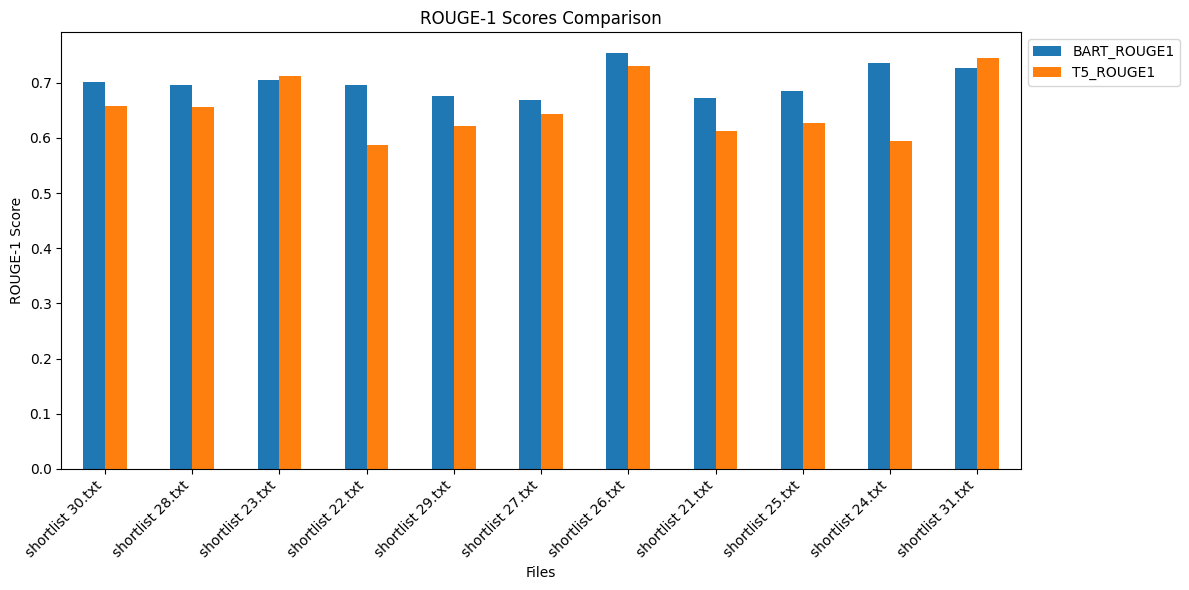

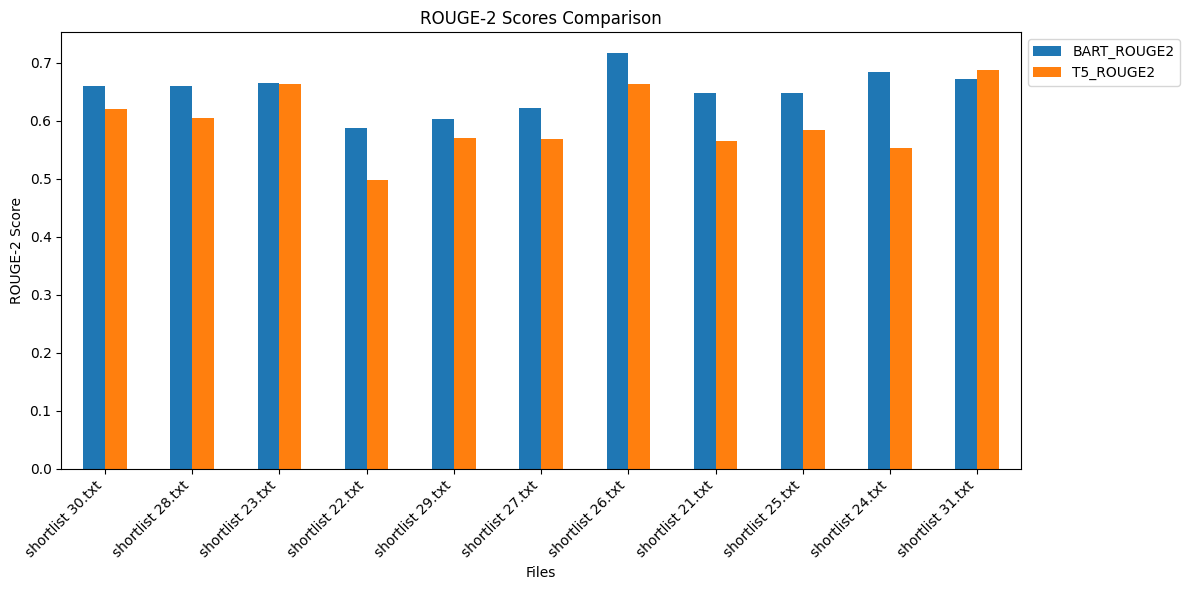

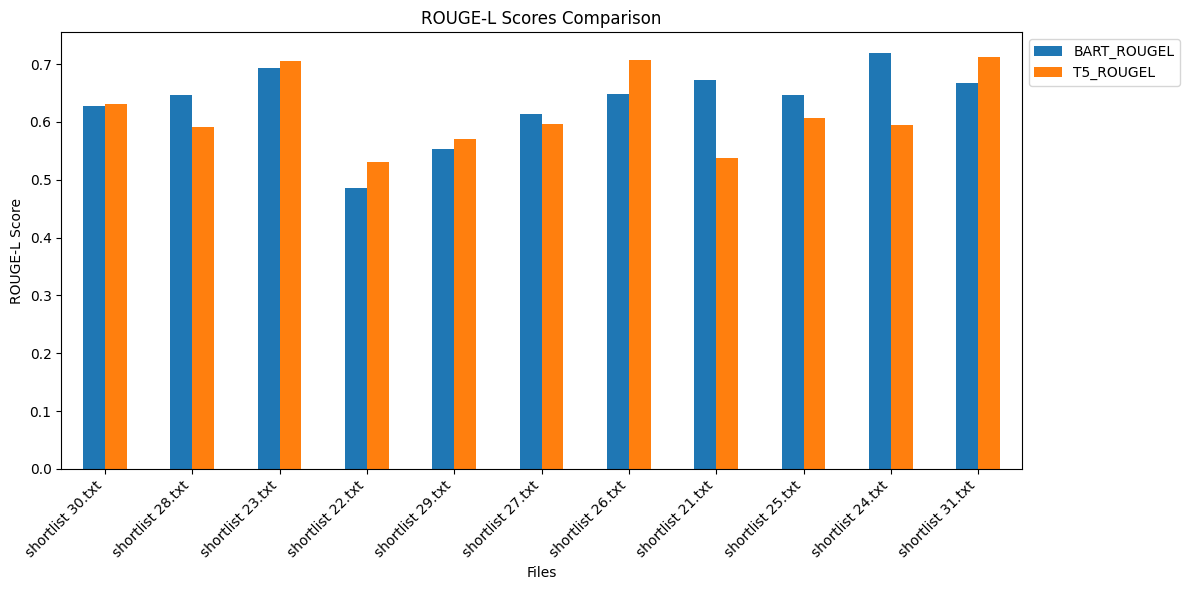

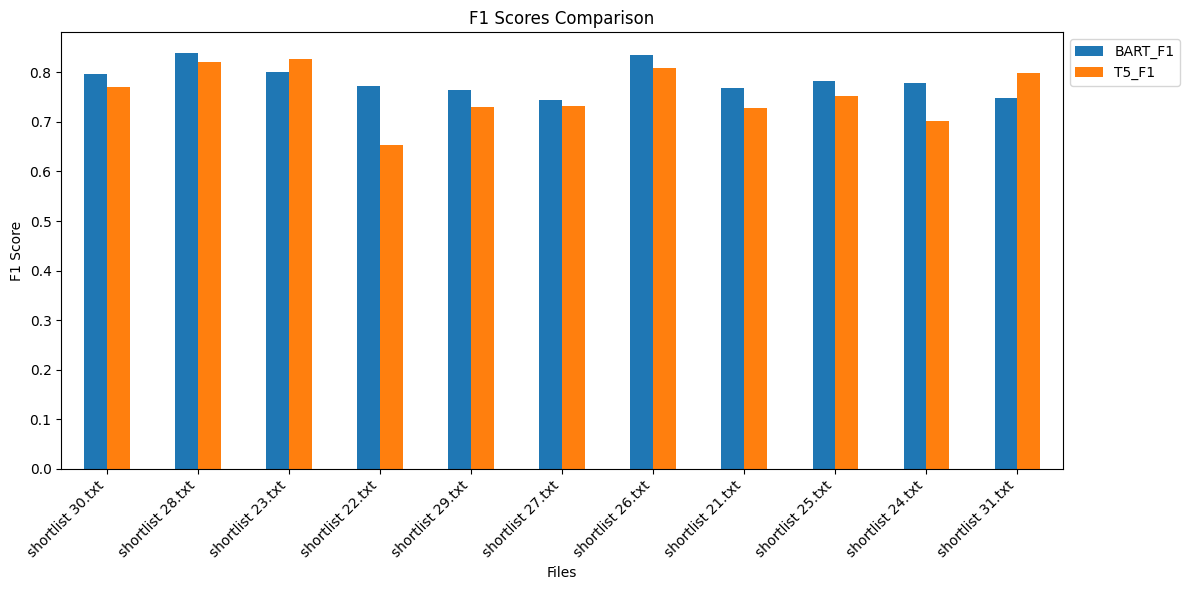

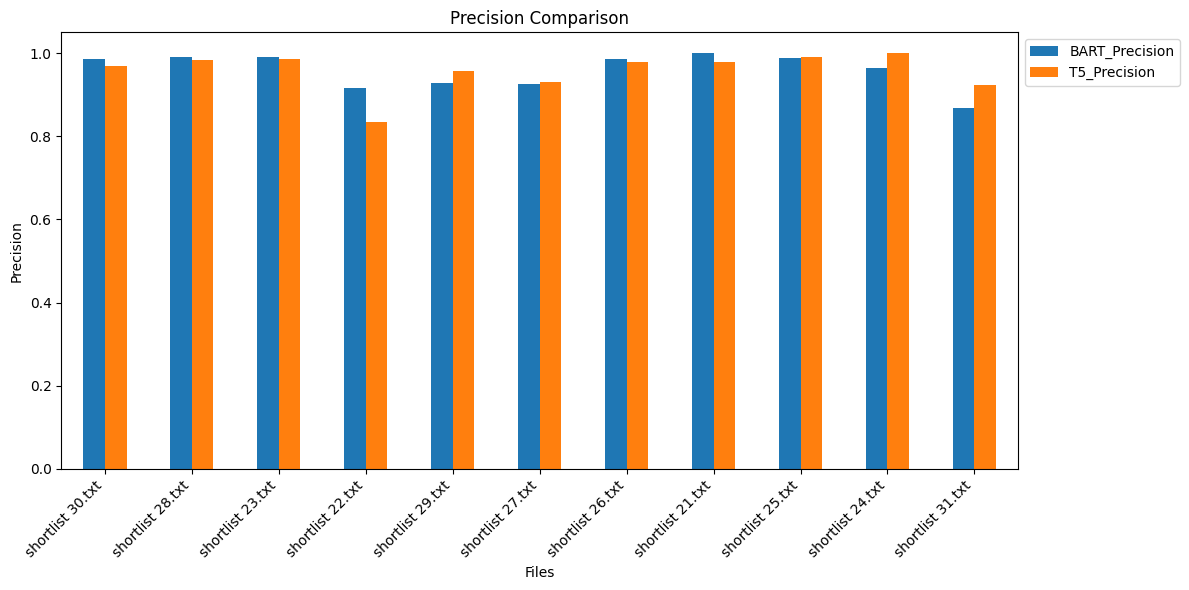

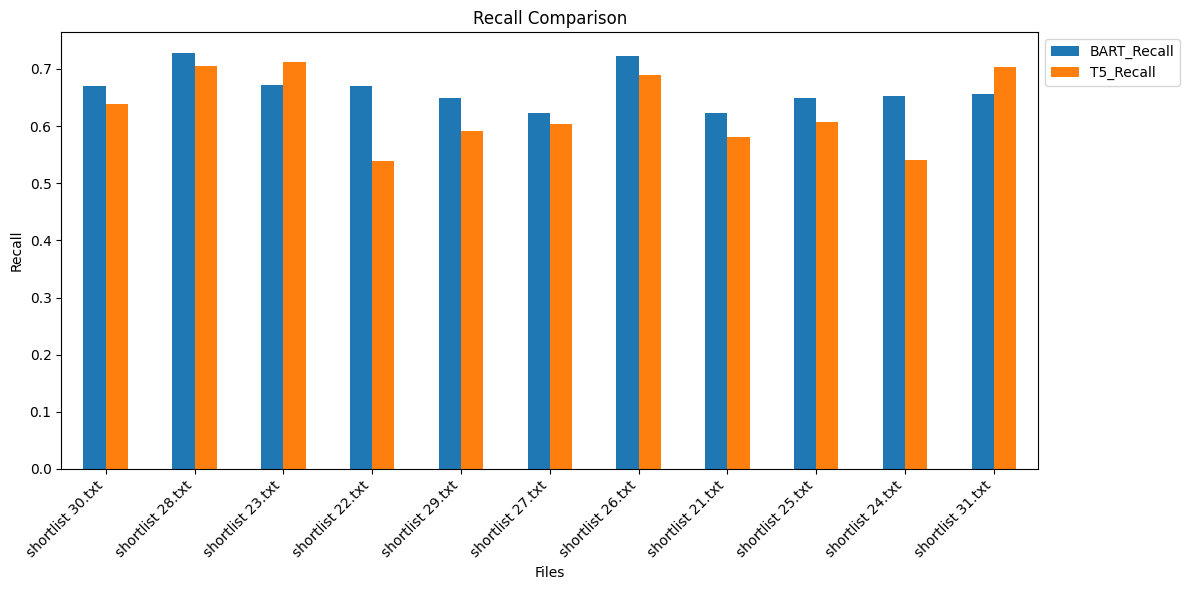

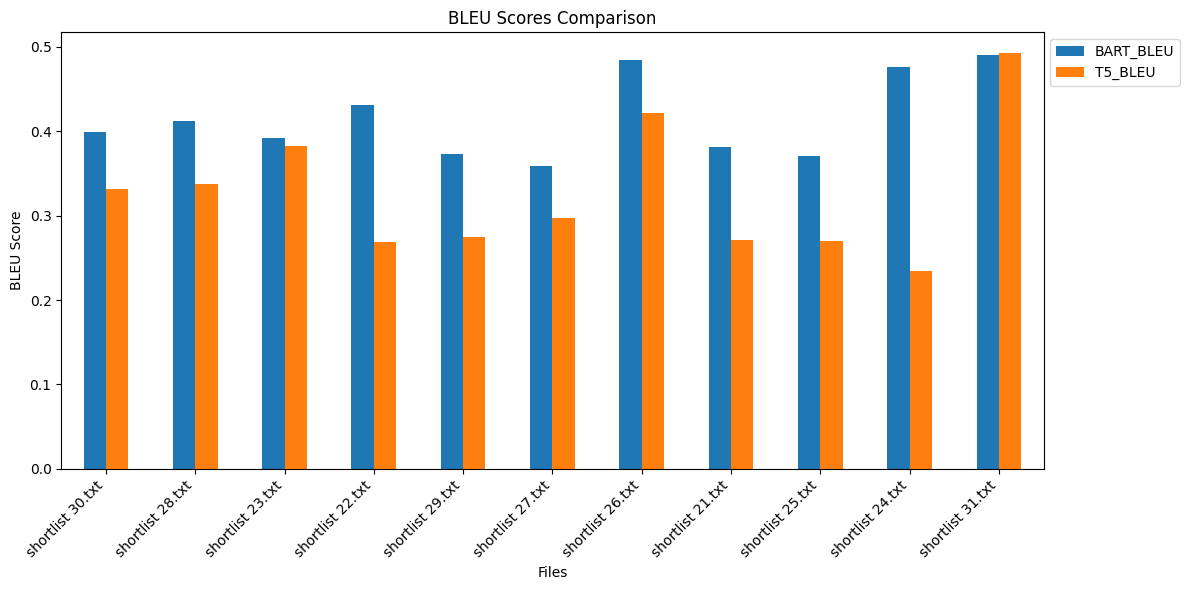

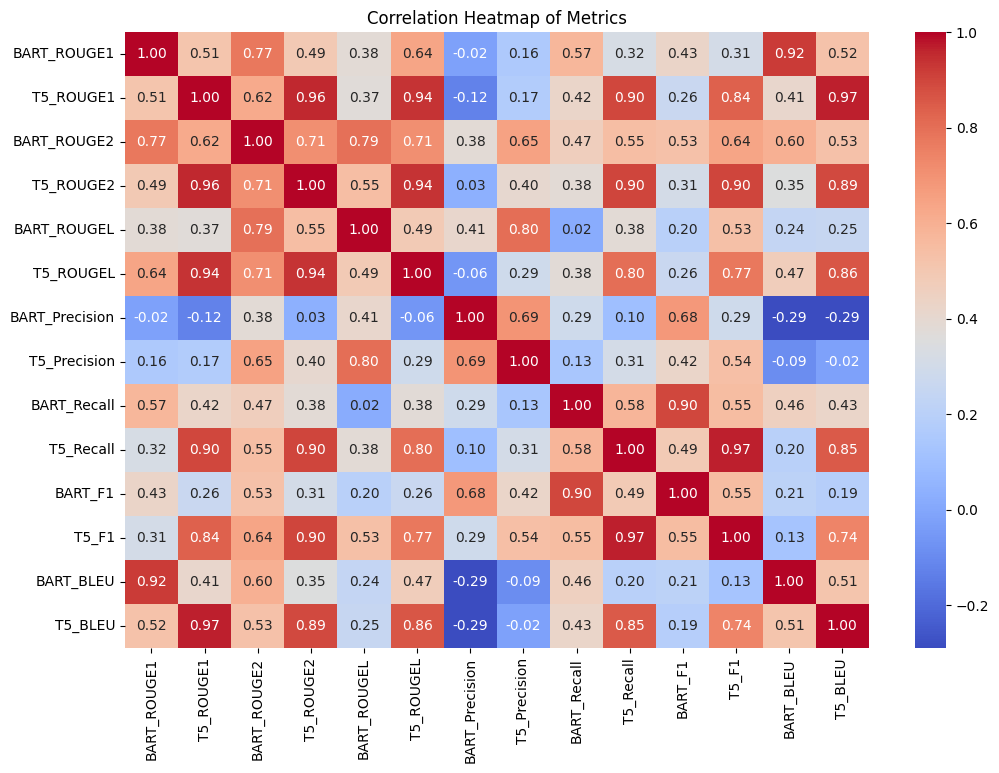

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the saved Excel file with the metrics
file_path = '/content/drive/MyDrive/NLP Folder/excelsheet/comparison_with_rouge_f1_bleu.xlsx'
df = pd.read_excel(file_path)

# Display the dataframe to ensure it loaded correctly
print(df.head())

# Define a function to plot metrics
def plot_metric(df, metric_columns, title, ylabel):
    df_plot = df[["File"] + metric_columns]
    df_plot.set_index("File", inplace=True)

    # Plot the metrics
    df_plot.plot(kind="bar", figsize=(12, 6))
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel("Files")
    plt.xticks(rotation=45, ha='right')
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.tight_layout()
    plt.show()

# Plot ROUGE scores
plot_metric(df, ["BART_ROUGE1", "T5_ROUGE1"], "ROUGE-1 Scores Comparison", "ROUGE-1 Score")
plot_metric(df, ["BART_ROUGE2", "T5_ROUGE2"], "ROUGE-2 Scores Comparison", "ROUGE-2 Score")
plot_metric(df, ["BART_ROUGEL", "T5_ROUGEL"], "ROUGE-L Scores Comparison", "ROUGE-L Score")

# Plot F1, Precision, and Recall
plot_metric(df, ["BART_F1", "T5_F1"], "F1 Scores Comparison", "F1 Score")
plot_metric(df, ["BART_Precision", "T5_Precision"], "Precision Comparison", "Precision")
plot_metric(df, ["BART_Recall", "T5_Recall"], "Recall Comparison", "Recall")

# Plot BLEU scores
plot_metric(df, ["BART_BLEU", "T5_BLEU"], "BLEU Scores Comparison", "BLEU Score")

# Heatmap of all metrics
metrics = ["BART_ROUGE1", "T5_ROUGE1", "BART_ROUGE2", "T5_ROUGE2", "BART_ROUGEL", "T5_ROUGEL",
           "BART_Precision", "T5_Precision", "BART_Recall", "T5_Recall", "BART_F1", "T5_F1",
           "BART_BLEU", "T5_BLEU"]

heatmap_data = df[metrics].corr()  # Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Metrics")
plt.show()


Automating the Analysis

We can extend your existing Python code to:

    Identify the best-performing model for each metric.
    Highlight the top results in your Excel file.

In [ ]:
import pandas as pd
from openpyxl import load_workbook
from openpyxl.styles import PatternFill, Font

# Load the Excel file
file_path = '/content/drive/MyDrive/NLP Folder/excelsheet/comparison_with_rouge_f1_bleu.xlsx'
df = pd.read_excel(file_path)

# Metrics to analyze
metrics = [
    "BART_ROUGE1", "BART_ROUGE2", "BART_ROUGEL",
    "T5_ROUGE1", "T5_ROUGE2", "T5_ROUGEL",
    "BART_Precision", "BART_Recall", "BART_F1",
    "T5_Precision", "T5_Recall", "T5_F1",
    "BART_BLEU", "T5_BLEU"
]

# Find best-performing model for each metric
best_performers = {}
for metric in metrics:
    best_row = df[metric].idxmax()
    best_performers[metric] = {
        "File": df.loc[best_row, "File"],
        "Score": df.loc[best_row, metric],
        "Model": "BART" if "BART" in metric else "T5"
    }

# Save highlights to Excel
wb = load_workbook(file_path)
sheet = wb.active

# Define highlight styles
highlight_fill = PatternFill(start_color="FFD700", end_color="FFD700", fill_type="solid")
font_bold = Font(bold=True)

# Highlight top-performing scores
for metric in metrics:
    best_row = df[metric].idxmax() + 2  # +2 because Excel rows are 1-indexed, header is row 1
    best_col = df.columns.get_loc(metric) + 1  # +1 because Excel columns are 1-indexed
    cell = sheet.cell(row=best_row, column=best_col)
    cell.fill = highlight_fill
    cell.font = font_bold

# Save the updated file
highlighted_file_path = '/content/drive/MyDrive/NLP Folder/excelsheet/highlighted_results.xlsx'
wb.save(highlighted_file_path)

print(f"Top-performing scores highlighted and saved to {highlighted_file_path}.")


Top-performing scores highlighted and saved to /content/drive/MyDrive/NLP Folder/excelsheet/highlighted_results.xlsx.


 Interpreting the Results

Once you analyze the metrics:

    Summarize Model Performance:
        Compare BART and T5 across metrics.
        Highlight models that consistently perform well (e.g., high ROUGE, BLEU, and F1 scores).

    Visualization:
        Create visual summaries like bar charts or heatmaps to display metric scores for both models.

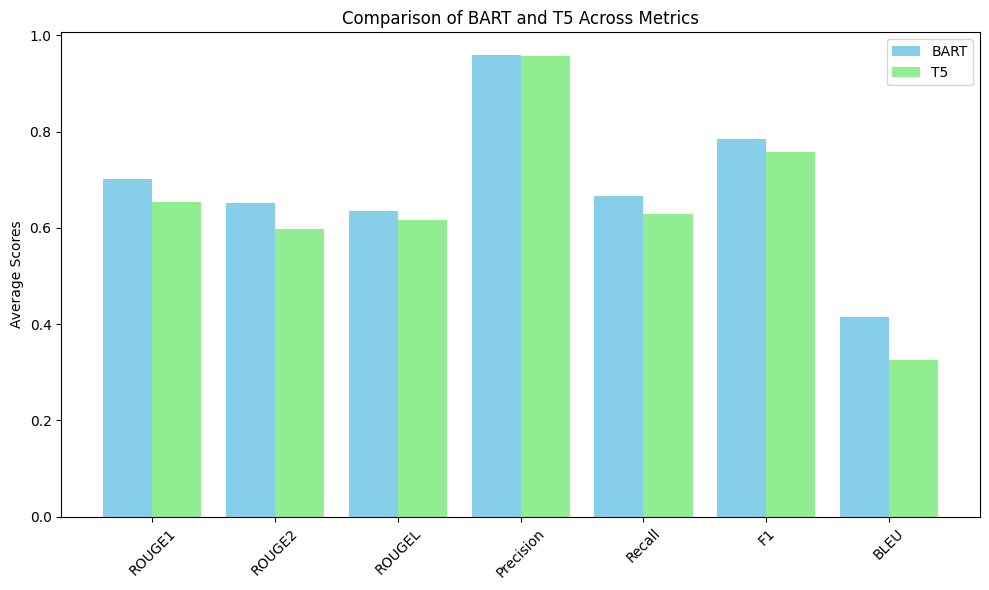

In [ ]:
import matplotlib.pyplot as plt

# Average scores for BART and T5
bart_scores = df[[
    "BART_ROUGE1", "BART_ROUGE2", "BART_ROUGEL",
    "BART_Precision", "BART_Recall", "BART_F1", "BART_BLEU"
]].mean()

t5_scores = df[[
    "T5_ROUGE1", "T5_ROUGE2", "T5_ROUGEL",
    "T5_Precision", "T5_Recall", "T5_F1", "T5_BLEU"
]].mean()

# Plot bar chart
labels = ["ROUGE1", "ROUGE2", "ROUGEL", "Precision", "Recall", "F1", "BLEU"]
x = range(len(labels))

plt.figure(figsize=(10, 6))
plt.bar(x, bart_scores, width=0.4, label="BART", color="skyblue", align='center')
plt.bar([i + 0.4 for i in x], t5_scores, width=0.4, label="T5", color="lightgreen", align='center')
plt.xticks([i + 0.2 for i in x], labels, rotation=45)
plt.ylabel("Average Scores")
plt.title("Comparison of BART and T5 Across Metrics")
plt.legend()
plt.tight_layout()
plt.show()
